In [1]:
import pandas as pd
import numpy as np
from numpy.random import permutation
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from spdt import NaiveStreamForest, CascadeStreamForest

In [2]:
def prediction(classifier):
    predictions = classifier.predict(X_test)

    p_t = 0
    for i in range(X_test.shape[0]):
        if predictions[i] == y_test[i]:
            p_t += 1

    return p_t / X_test.shape[0]

## Stream Forests

In [3]:
def experiment_100():
    rf_l = []
    dt_l = []
    nsf_l = []
    csf_l = []

    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    nsf = NaiveStreamForest()
    csf = CascadeStreamForest()

    for i in range(70):

        rf.fit(X_r.iloc[: (i + 1) * 100], y_r.iloc[: (i + 1) * 100])
        rf_l.append(prediction(rf))

        dt.fit(X_r.iloc[: (i + 1) * 100], y_r.iloc[: (i + 1) * 100])
        dt_l.append(prediction(dt))

        X_t = X_r.iloc[i * 100 : (i + 1) * 100]
        y_t = y_r.iloc[i * 100 : (i + 1) * 100]
        
        nsf.fit(X_t, y_t)
        nsf_l.append(prediction(nsf))
        
        csf.fit(X_t, y_t)
        csf_l.append(prediction(csf))

    p_l = []
    p_l.append(rf_l)
    p_l.append(dt_l)
    p_l.append(nsf_l)
    p_l.append(csf_l)

    return p_l

In [4]:
results = []
pendigits = pd.read_csv("pendigits.tra", header = None)
pendigits_test = pd.read_csv("pendigits.tes", header = None)
X_test = pendigits_test.iloc[:,:-1]
y_test = pendigits_test.iloc[:,-1]

for i in range(100):
    p = pendigits.sample(frac=1)
    X_r = p.iloc[:,:-1]
    y_r = p.iloc[:,-1]
    
    results.append(experiment_100())

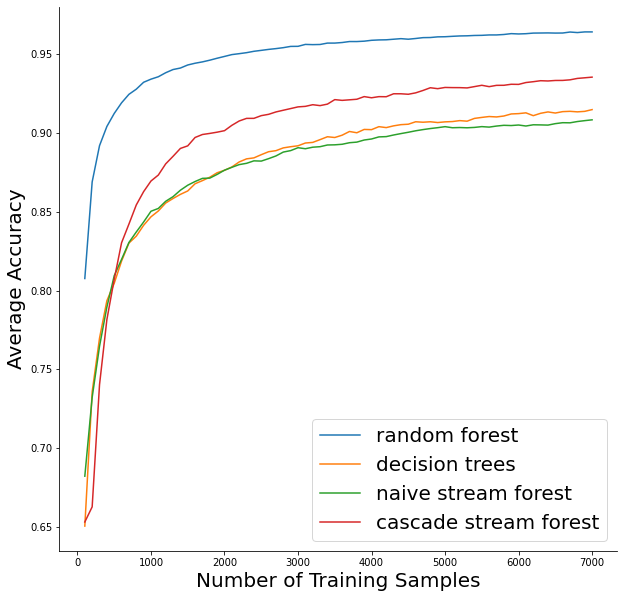

In [5]:
# impurity same version
means = np.mean(results, axis=0)

import matplotlib.pyplot as plt
%matplotlib inline

n_train = range(100, 7100, 100)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Number of Training Samples", fontsize = 20)
ax.set_ylabel("Average Accuracy", fontsize = 20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(n_train, means[0], label="random forest")
plt.plot(n_train, means[1], label="decision trees")
plt.plot(n_train, means[2], label="naive stream forest")
plt.plot(n_train, means[3], label="cascade stream forest")
plt.legend(fontsize = 20)

## Stream Decision Trees

In [7]:
def experiment_100():
    rf_l = []
    dt_l = []
    sdt_l = []

    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    sdt = DecisionTreeClassifier()
    not_first = False

    for i in range(70):

        rf.fit(X_r.iloc[: (i + 1) * 100], y_r.iloc[: (i + 1) * 100])
        rf_l.append(prediction(rf))

        dt.fit(X_r.iloc[: (i + 1) * 100], y_r.iloc[: (i + 1) * 100])
        dt_l.append(prediction(dt))

        X_t = X_r.iloc[i * 100 : (i + 1) * 100]
        y_t = y_r.iloc[i * 100 : (i + 1) * 100]

        sdt.fit(X_t, y_t, update_tree=not_first)
        not_first = True
        sdt_l.append(prediction(sdt))

    p_l = []
    p_l.append(rf_l)
    p_l.append(dt_l)
    p_l.append(sdt_l)

    return p_l

In [4]:
results = []
pendigits = pd.read_csv("pendigits.tra", header = None)
pendigits_test = pd.read_csv("pendigits.tes", header = None)
X_test = pendigits_test.iloc[:,:-1]
y_test = pendigits_test.iloc[:,-1]

for i in range(100):
    p = pendigits.sample(frac=1)
    X_r = p.iloc[:,:-1]
    y_r = p.iloc[:,-1]
    
    results.append(experiment_100())

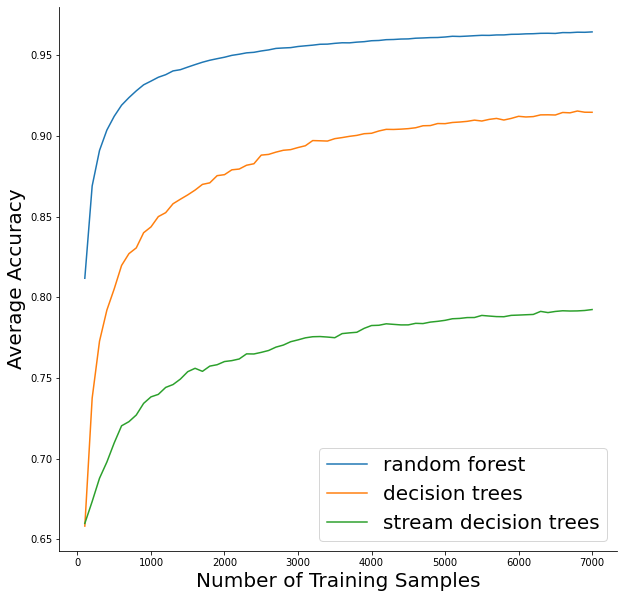

In [5]:
# impurity same version
means = np.mean(results, axis=0)

import matplotlib.pyplot as plt
%matplotlib inline

n_train = range(100, 7100, 100)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Number of Training Samples", fontsize = 20)
ax.set_ylabel("Average Accuracy", fontsize = 20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(n_train, means[0], label="random forest")
plt.plot(n_train, means[1], label="decision trees")
plt.plot(n_train, means[2], label="stream decision trees")
plt.legend(fontsize = 20)